<a href="https://www.kaggle.com/code/alkaifansari000/sna-cd?scriptVersionId=236460930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Graph library
import networkx as nx  

# For visualization
import matplotlib.pyplot as plt 

# Community detection methods
import networkx.algorithms.community as nx_comm  

# Evaluation metrics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Additional: Louvain method (requires install)
!pip install python-louvain

# Import
import community.community_louvain as community_louvain
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the built-in Karate Club graph
G = nx.karate_club_graph()

##  Basic Visualization

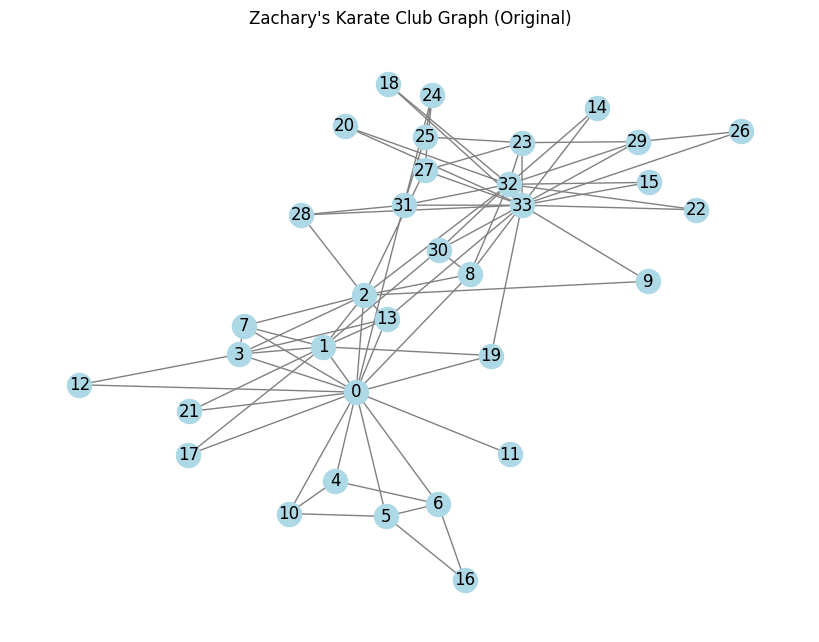

In [3]:
# Draw the raw graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Zachary's Karate Club Graph (Original)")
plt.show()


# Apply Various Community Detection Algorithms

## Girvan-Newman Algorithm
- Detects communities by progressively removing edges with the highest "betweenness" — edges that connect different communities.

In [4]:
# Girvan-Newman community detection
girvan_newman_communities = next(nx_comm.girvan_newman(G))  # only first split
girvan_newman_communities = [list(c) for c in girvan_newman_communities]
print("Girvan-Newman Communities:", girvan_newman_communities)

Girvan-Newman Communities: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


## Louvain Method
- Detects communities by optimizing modularity, a measure of the density of links inside communities compared to links between communities

In [5]:
louvain_partition = community_louvain.best_partition(G)

# Convert dict to community list
louvain_communities = {}
for node, comm in louvain_partition.items():
    louvain_communities.setdefault(comm, []).append(node)
louvain_communities = list(louvain_communities.values())
print("Louvain Communities:", louvain_communities)

Louvain Communities: [[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [24, 25, 28, 31]]


## Label Propagation Algorithm (LPA)
- Detects communities by letting nodes iteratively adopt the label that most of their neighbors have

In [6]:
# Label Propagation community detection
lpa_communities = list(nx_comm.label_propagation_communities(G))
lpa_communities = [list(c) for c in lpa_communities]
print("Label Propagation Communities:", lpa_communities)

Label Propagation Communities: [[0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31], [32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30], [16, 5, 6]]


## Plotting Communities with Different Colors


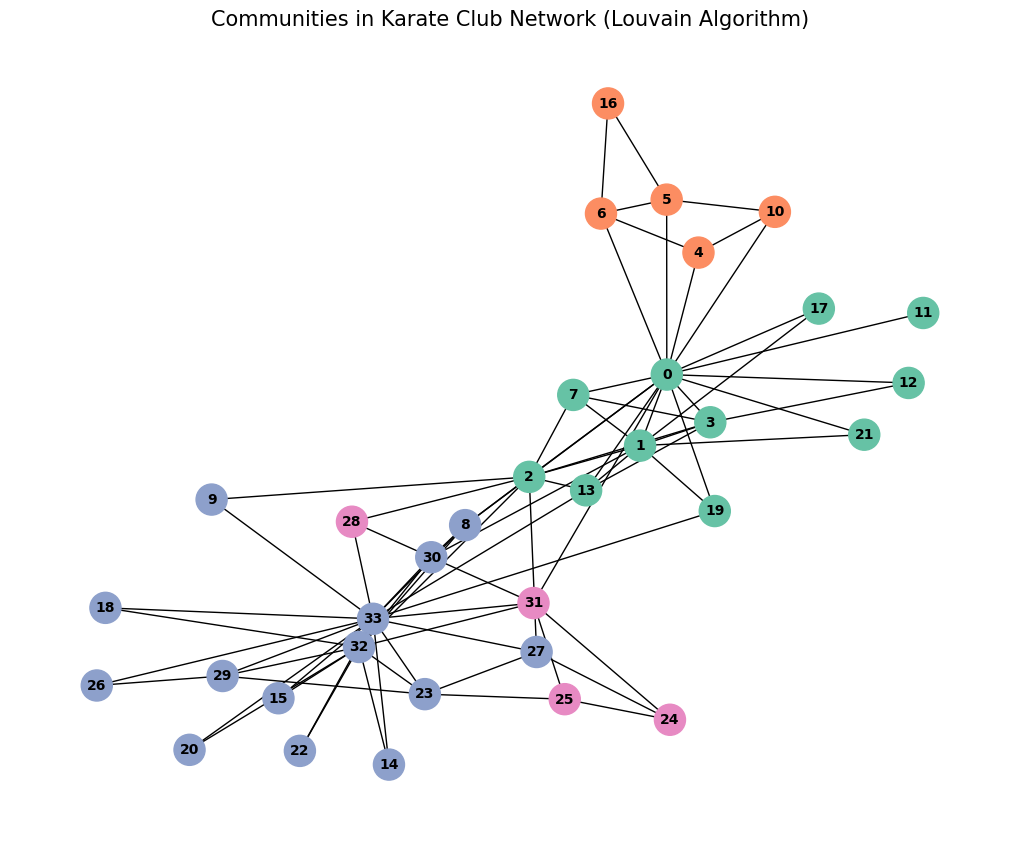

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Assigning colors to nodes based on communities detected by Louvain algorithm
# Nodes will be colored according to their community
def plot_communities_with_seaborn(G, communities):
    # Create a list of colors where each node's color corresponds to its community
    colors = []
    for node in G.nodes():
        for i, community in enumerate(communities):
            if node in community:
                colors.append(i)
                break
    
    # Create a color palette using seaborn
    palette = sns.color_palette("Set2", len(communities))  # Set2 palette for distinct colors

    # Draw the graph with node colors based on community
    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=[palette[c] for c in colors], with_labels=True, node_size=500, font_size=10, font_weight='bold')
    plt.title("Communities in Karate Club Network (Louvain Algorithm)", size=15)
    plt.show()

# Call the function to plot the network with community colors using Seaborn
plot_communities_with_seaborn(G, louvain_communities)

# Evaluation and Comparison

## Modularity
- This measures the density of edges inside communities compared to the density of edges outside communities. Higher modularity indicates a better community structure

In [8]:
 from networkx.algorithms.community import modularity

# Function to calculate modularity for the detected communities
def calculate_modularity(G, communities):
    return modularity(G, communities)

# Calculate modularity for Louvain and Girvan-Newman communities
modularity_louvain = calculate_modularity(G, louvain_communities)
modularity_girvan_newman = calculate_modularity(G, girvan_newman_communities)

# Print the modularity results
print(f"Modularity of Louvain communities: {modularity_louvain}")
print(f"Modularity of Girvan-Newman communities: {modularity_girvan_newman}")

Modularity of Louvain communities: 0.4438541256723075
Modularity of Girvan-Newman communities: 0.3476602762317048


## Plotting Modularity 

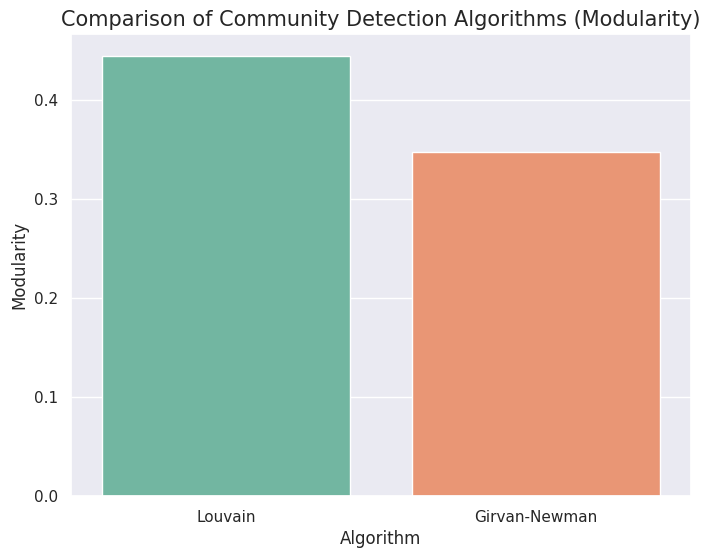

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Prepare the data for the bar plot
algorithms = ['Louvain', 'Girvan-Newman']
modularities = [modularity_louvain, modularity_girvan_newman]

# Create a Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=modularities, palette='Set2')

# Add title and labels
plt.title("Comparison of Community Detection Algorithms (Modularity)", size=15)
plt.ylabel("Modularity", size=12)
plt.xlabel("Algorithm", size=12)
plt.show()


## Adjusted Rand Index (ARI)
- a metric used to compare two different community partitions. It measures the similarity between the two partitions while adjusting for chance. A value of 1 means the partitions are identical, 0 indicates random similarity, and negative values suggest worse-than-random similarity

In [10]:
from sklearn.metrics import adjusted_rand_score

# Adjusted Rand Index (ARI) comparison between the community partitions
def get_community_labels(communities, n_nodes):
    labels = [-1] * n_nodes
    for comm_id, community in enumerate(communities):
        for node in community:
            labels[node] = comm_id
    return labels

# Get community labels for both algorithms
louvain_labels = get_community_labels(louvain_communities, len(G.nodes))
girvan_newman_labels = get_community_labels(girvan_newman_communities, len(G.nodes))

# Calculate ARI
ari_score = adjusted_rand_score(louvain_labels, girvan_newman_labels)

# Calculate Modularity (already done earlier)
modularity_louvain = calculate_modularity(G, louvain_communities)
modularity_girvan_newman = calculate_modularity(G, girvan_newman_communities)

# Print ARI and Modularity results for both algorithms
print(f"Modularity of Louvain communities: {modularity_louvain}")
print(f"Modularity of Girvan-Newman communities: {modularity_girvan_newman}")
print(f"Adjusted Rand Index (ARI) between Louvain and Girvan-Newman: {ari_score}")


Modularity of Louvain communities: 0.4438541256723075
Modularity of Girvan-Newman communities: 0.3476602762317048
Adjusted Rand Index (ARI) between Louvain and Girvan-Newman: 0.5190218434488848


##  Plotting the Evaluation Results